In [156]:
from movie_sentiment.ml_logic.movie_score import movie_score
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [123]:
def movie_score_fixed(movie_title):
    return movie_score(movie_title, chunk_type='sentence', pad=50, group_chunk=10, window_size=50)

In [124]:
up = movie_score_fixed('Up_1049413.txt')

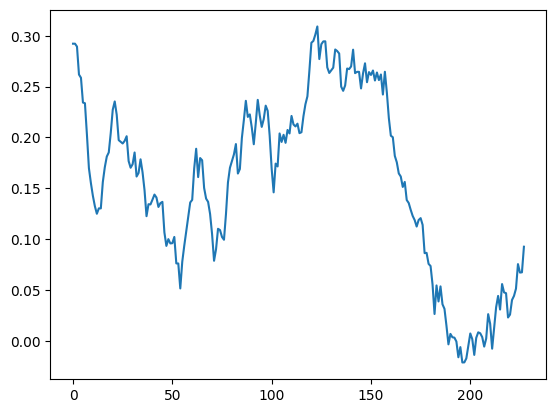

In [125]:
plt.plot(up)

In [126]:
len(up)

228

In [139]:
aux = np.arange(0,len(up), math.floor(len(up)/30))
len(aux)

33

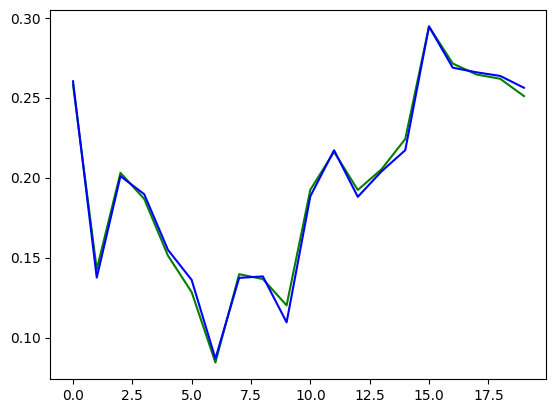

In [128]:
calc_mean = []
# calc_mode = []
calc_median = []
for i in range(0,20):
    if i == 20:
        calc_mean.append(np.mean(up[aux[i]:]))
        # calc_mode.append(mode(up[aux[i]:]))
        calc_median.append(np.median(up[aux[i]:]))
    else:
        calc_mean.append(np.mean(up[aux[i]:aux[i+1]]))
        # calc_mode.append(mode(up[aux[i]:aux[i+1]]))
        calc_median.append(np.median(up[aux[i]:aux[i+1]]))
plt.plot(calc_mean, color='green', label='mean')
# plt.plot(calc_mode, color='red', label='mode')
plt.plot(calc_median, color='blue', label='median')

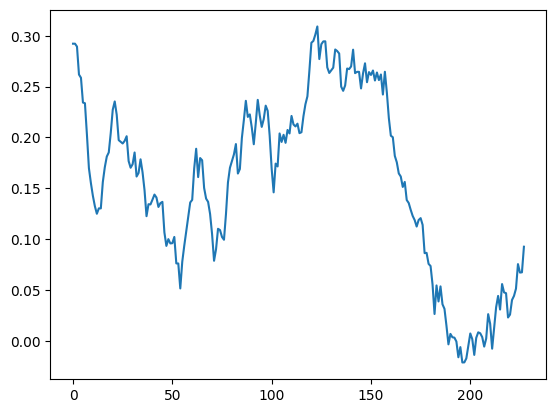

In [129]:
plt.plot(up)

In [152]:
def reshaping_curve(movie_title, intervals=20):
    
    data = movie_score_fixed(movie_title)
    limits = np.arange(0,len(data), math.floor(len(data)/intervals))
    
    calc_mean = []
    calc_median = []
    
    for i in range(0,intervals):
        if i == len(limits)-1:
            calc_mean.append(np.mean(data[limits[i]:]))
            calc_median.append(np.median(data[limits[i]:]))
        elif i < len(limits):
            calc_mean.append(np.mean(data[limits[i]:limits[i+1]]))
            calc_median.append(np.median(data[limits[i]:limits[i+1]]))
        else:
            calc_mean.append(np.mean(data[limits[-1]:]))
            calc_median.append(np.median(data[limits[-1]:]))

    fig, axs = plt.subplots(1,2, figsize=(12, 4))
    
    axs[0].plot(calc_mean, color='green', label='mean')
    # axs[0].plot(calc_median, color='blue', label='median')
    axs[0].legend()
    axs[0].set_title('reshaped', fontsize=10)
    
    axs[1].plot(data)
    axs[1].set_title('original', fontsize=10)

    return calc_mean

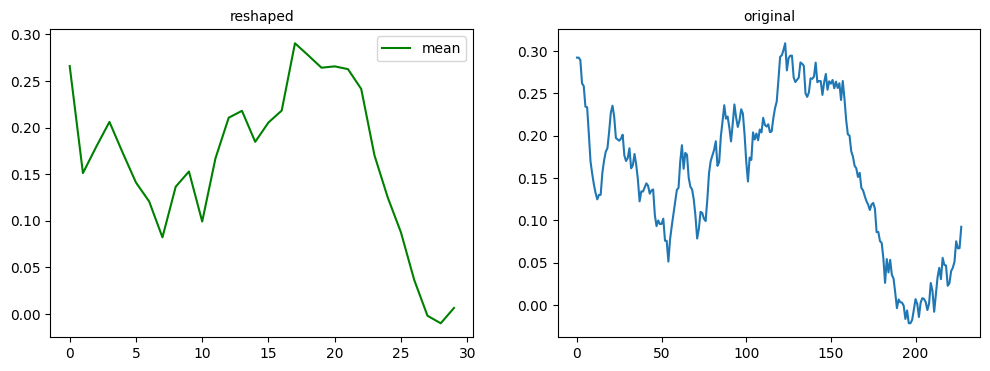

In [153]:
up_func = reshaping_curve('Up_1049413.txt',30)

In [159]:
pd.DataFrame([up_func])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.266027,0.151147,0.179327,0.206084,0.172994,0.141092,0.120661,0.082217,0.13656,0.152856,...,0.265649,0.262661,0.241401,0.170205,0.125076,0.087431,0.036481,-0.001859,-0.009949,0.006468


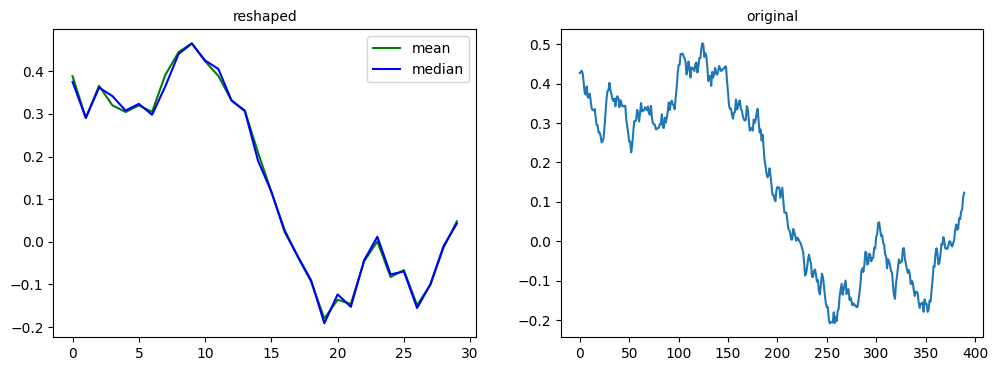

In [142]:
reshaping_curve('Titanic_0120338.txt', 30)

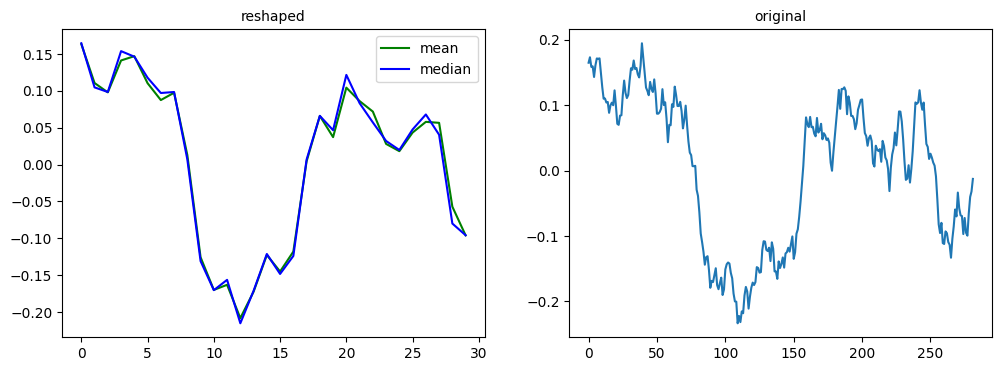

In [143]:
reshaping_curve('V for Vendetta_0434409.txt', 30)

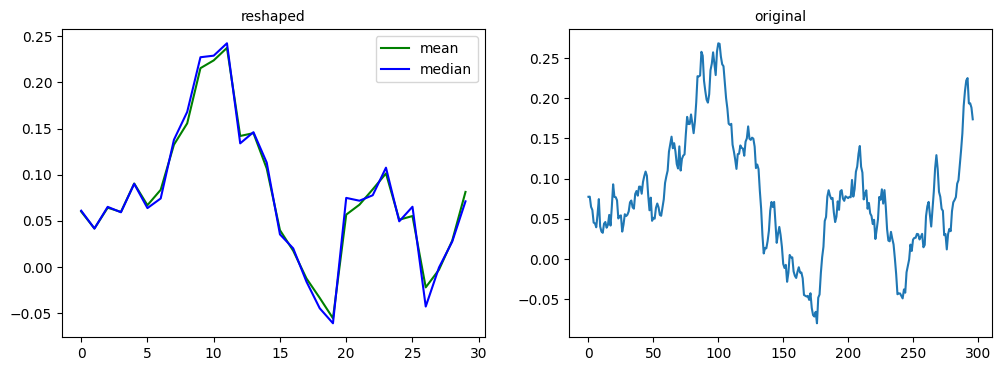

In [144]:
reshaping_curve('Harry Potter and the Sorcerer s Stone_0241527.txt', 30)

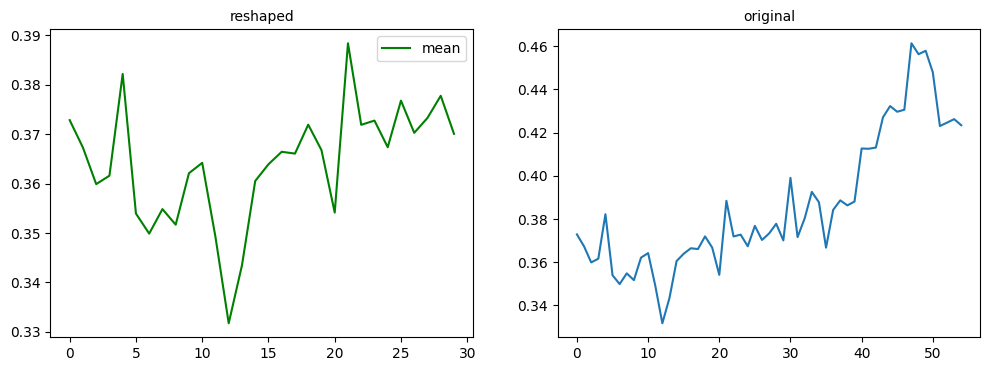

In [147]:
reshaping_curve('Hairspray_0427327.txt', 30)

In [161]:
data = pd.read_pickle('processed_data/arcs_dict.pickle')

In [168]:
len(data.keys())

10

In [ ]:
import numpy as np

def reshaping_curve(processed_script, intervals=30):
    limits = np.arange(0,len(processed_script), math.floor(len(processed_script)/intervals))
    reshaped_script = []

    for i in range(0, intervals):
        if i == len(intervals)-1:
            reshaped_script.append(np.mean(processed_script[limits[i]:]))
        else:
            reshaped_script.append(np.mean(processed_script[limits[i]:limits[i+1]]))

    return reshaped_script